Ok, diatomic 1D chain now!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nk = 20 # how do I know this???
kvec = np.zeros(nk)
eps_A = 0.25
eps_B = 0.75
t = 0.5

In [3]:
kvec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [4]:
for ik in range(nk):
    kvec[ik] = 2*np.pi*ik/nk

In [5]:
kvec

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604])

In [6]:
kvec = kvec - np.pi
kvec

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339])

In [7]:
nr = 3 # for two neighbours + onsite term
Rvec = np.zeros(nr)
Rvec[0] = 0 #a
Rvec[1] = 1 #a
Rvec[2] = -1 #a

norb = 2
HR = np.zeros((norb, norb, nr))
#HR[0] = eps # onsite energy
#HR[1] = HR[2] = -t # hopping term

In [8]:
HR

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [9]:
HR[0,0,0] = eps_A
HR[1,1,0] = eps_B
HR[0,1,0] = -t
HR[0,1,2] = -t
HR[1,0,0] = -t
HR[1,0,1] = -t
HR

array([[[ 0.25,  0.  ,  0.  ],
        [-0.5 ,  0.  , -0.5 ]],

       [[-0.5 , -0.5 ,  0.  ],
        [ 0.75,  0.  ,  0.  ]]])

In [10]:
Ek = np.zeros((nk, norb), dtype=complex)

In [11]:
for ik in range(nk):
    Hk = np.zeros((norb, norb), dtype=complex)
    for ir in range(nr):
        phase = Rvec[ir] * kvec[ik]
        for iorb in range(norb):
            for jorb in range(norb):
                Hk[iorb, jorb] += HR[iorb, jorb, ir] * np.exp(-1j*phase)
    Hk = np.linalg.eig(Hk)
    for iorb in range(norb):
        Ek[ik, iorb] = Hk[0][iorb]

In [12]:
exact_plus = (eps_A + eps_B)/2 + np.sqrt(((eps_A - eps_B)/2)**2 + 2.*(t**2)*(1 + np.cos(kvec)))
exact_minus = (eps_A + eps_B)/2 - np.sqrt(((eps_A - eps_B)/2)**2 + 2.*(t**2)*(1 + np.cos(kvec)))

numerical = Ek

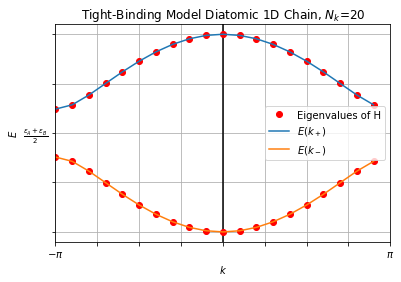

In [13]:
# fancy graph elements, all cool and noted
xticks = np.linspace(-np.pi, np.pi, 9)
xlabels = ['' for k in xticks]
xlabels[0] = '$-\pi$'
xlabels[-1] = '$\pi$'
fig, axs = plt.subplots()
axs.set_xlim(-np.pi, np.pi)
axs.set_title('Tight-Binding Model Diatomic 1D Chain, $N_k$='+str(nk))
axs.set_ylabel('$E$')
axs.set_xlabel('$k$')
axs.axvline(x=0., color='k')

axs.plot(kvec, np.real(numerical[:,0]), 'ro', label='Eigenvalues of H')
axs.plot(kvec, np.real(numerical[:,1]), 'ro')
axs.plot(kvec, exact_plus, label='$E(k_+)$')
axs.plot(kvec, exact_minus, label='$E(k_-)$')

# fancy graph elemants, all cool and noted
yticks = np.linspace((eps_A + eps_B)/2 + np.sqrt(((eps_A - eps_B)/2)**2 + 2.*(t**2)*(1 + 1)), (eps_A + eps_B)/2 - np.sqrt(((eps_A - eps_B)/2)**2 + 2.*(t**2)*(1 + 1)), 5)
ylabels = ['' for k in yticks]
ylabels[2] = '$\\frac{\epsilon_A + \epsilon_B}{2}$'
axs.set_yticks(yticks)
axs.set_yticklabels(ylabels)
axs.set_xticks(xticks)
axs.set_xticklabels(xlabels)
axs.legend()
axs.grid(True)